Before we Start implementing cartpole gym environment with Q- learning and deep Q-learning we will give brief description about what cartpole environment is.  

## CartPole-v1 Gym Environment:
In cartpole simulation we have one pole which is connected to one moving cart. Cart moves in horizontal path. Agent's job is to keep pole on the cart balanced by moving cart left or Right. And our environment is considered solved if our angent can maintain balance for 500 consecutive time stamps.
The state environment is defined by the 4-tuple with entities like cart's position, velocity, the pole's angle, and its angular velocity. We can move cart to the right or left and +1 reward is given for each time stamp pole is balanced. And the episode ends if our pole falls or we move cart too far from the center of the track. 

Here we have Picture to visulize clearly of what cartpole is and how it works.

Link of the image: "https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.oreilly.com%2Flibrary%2Fview%2Fhands-on-q-learning-with%2F9781789345803%2Fa8a2cb05-8654-4cd1-b9c3-84d5c193de06.xhtml&psig=AOvVaw2xlNwz6vRm7iNFgQFu_m3A&ust=1680888599967000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCMibl5Hklf4CFQAAAAAdAAAAABAK"

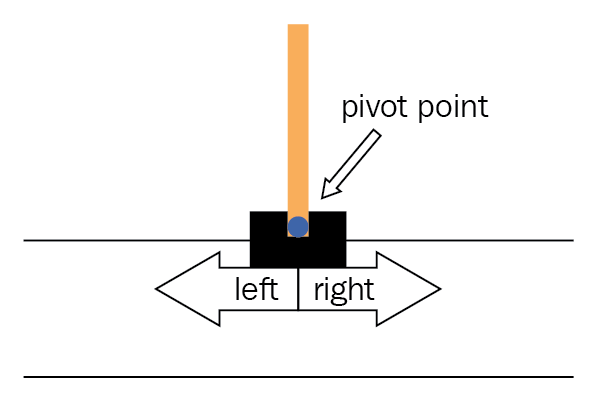


# Q-learning algorithm on CartPole-v1 gym environment.

In [1]:
# Importing necessary libraries for the implementation.
import gym # Importing gym library for the environment.
import numpy as np # Data manipulation 
import matplotlib.pyplot as plt # For plotting the graphs.

In [2]:
# For the implementation we will start with the initialization of our environment.
cartpole_environment = gym.make('CartPole-v1') 

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
# Now we will generate the Q table for our environment.
# We know that Q -table is a 2D array and it takes two arguments, the rows of the Q - table represents the states that our agent can be in and 
# columns represents all the action that agent can take in each state. In our case as explained earlier we have two actions to take in each state.

# Getting the action space and observation space
cartpole_observe_space = cartpole_environment.observation_space.shape[0]
cartpole_action_space  = cartpole_environment.action_space.n
print('Possible oservation space:', cartpole_observe_space)
print('Possible action space:',cartpole_action_space)

Possible oservation space: 4
Possible action space: 2


In [4]:
# Here we are creating q table for the environment with the help from observation space and action space.
cartpole_q_table = np.zeros((cartpole_observe_space, cartpole_action_space))
cartpole_q_table

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [5]:
# Then for the Q-learning algorithm we need to set the hyperparameters.
# Below are the parameters that we have defined for our cartpole environment.
alpha = 0.1   # here alpha is our learning rate for cartpole. 
gamma = 0.9   # gamma is our discount factor.
epsilon = 0.1 # here epsilon is kept low because we want our agent to take action with highest Q - Value

In [6]:
# here to keep the values of two metrics we are difining two lists and during the episodes we will append the values in it so at the end we will plot the graph with it.
cartpole_average_rewards = []
cartpole_cumulative_rewards = []

In [7]:
# Now we will implement Q-Learning algorithm on our environment:

# As per the instruction we are running this loop for the 3000 episodes.
for episode in range(3000):
    # here we will reset our environment on the starting of the each episode and will obtain initial observations.
    initial_observation = cartpole_environment.reset() 
    # initially we are assigning total reward to zero. 
    cartpole_total_reward = 0
    # purpose of this second loop is that during each episodes we want our loop to run for 200 time stamps.
    for _ in range(200):
        # Here we will choose best action using epsilon-greedy policy
        # Main logic here to choose best action is that for the each time stamp random() function will generate value between 0 and 1 
        # And if our random value is less than our epsilon value then we will select random action with the help of action_space.sample(). 
        if np.random.uniform(0, 1) < epsilon:
            best_action = cartpole_environment.action_space.sample()
        else:
            # Otherwise if the random value is greater than we will choose action with the highest Q value.
            best_action = np.argmax(cartpole_q_table[initial_observation.astype(int)])

        # Then chosen best action is pass to the environment to get new_observations,reward.
        # Done flag will indicate that our episode is terminated or not.
        new_observation, reward, done, info = cartpole_environment.step(best_action)

        # Next step is to update the Q-value 
        # to update the Q-value we have used Q-learning update rule.
        # Below is the mathematical formula that we have used to update the values of q table.

        # Formula: Q(S,a) = Q(S,a) + alpha[R(s,a) + gamma*maxQ'(S',a') - Q(S,a)]. We have mapped our variables to this formula and used it below. 

        cartpole_q_table[initial_observation.astype(int), best_action] = cartpole_q_table[initial_observation.astype(int), best_action] +  alpha * (
            reward + gamma * np.max(cartpole_q_table[new_observation.astype(int)]) - cartpole_q_table[initial_observation.astype(int), best_action]
            ) 
        
        # new_observations value is updated to initial_observation
        initial_observation = new_observation
        # Adding the current reward to total reward.
        cartpole_total_reward = cartpole_total_reward + reward
        if done:  # here is our done flag is TRUE then second will be terminated and episode ends.
            break
    # For calculating average reward we are dividing the total reward by our time stamps in each episodes.        
    average_reward = cartpole_total_reward / 200
    # calculating the cumalative reward.
    cumulative_reward = np.sum(cartpole_average_rewards) + average_reward

    # For the plot we are appending both average and cumulative reward in their respective list.
    cartpole_average_rewards.append(average_reward)
    cartpole_cumulative_rewards.append(cumulative_reward)
# Printing the average reward for the agent in all episodes.    
print("Average reward of random agent: ", np.mean(cartpole_average_rewards))
print("cumulative reward:",np.mean(cartpole_cumulative_rewards))

Average reward of random agent:  0.04956833333333334
cumulative reward: 74.42013666666666


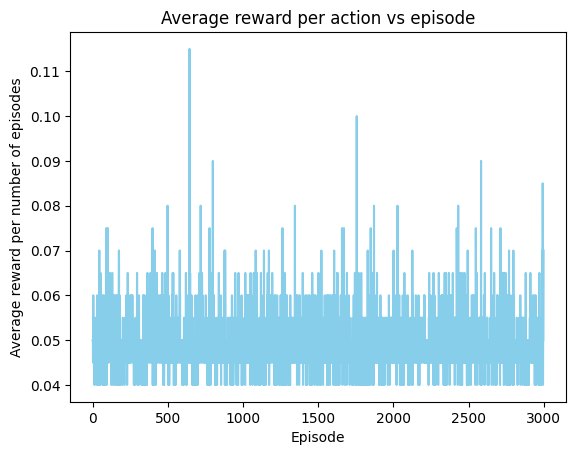

In [8]:
# Plot average reward per move
plt.plot(cartpole_average_rewards,color = "skyblue")
plt.xlabel('Episode')
plt.ylabel('Average reward per number of episodes')
plt.title('Average reward per action vs episode')
plt.show()

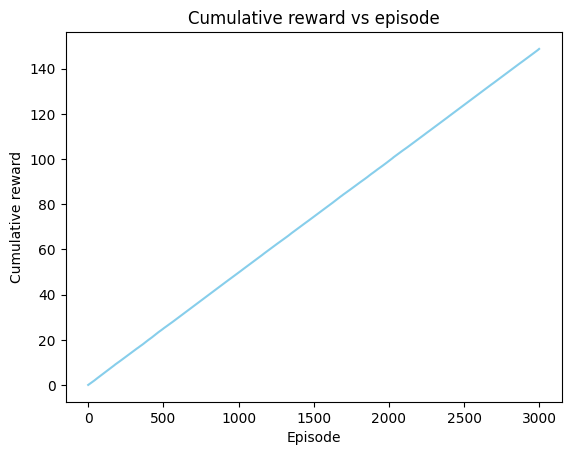

In [9]:
# Plot cumulative reward vs number of episodes
plt.plot(cartpole_cumulative_rewards,color="skyblue")
plt.xlabel('Episode')
plt.ylabel('Cumulative reward')
plt.title('Cumulative reward vs episode')
plt.show()

In [11]:
# again initlizing the average and cumulative reward metrics for random agent
random_agent_average_rewards = []
random_agent_cumulative_rewards = []

# Now we will Run the random agent on total 1000 episodes.
for episode in range(3000):

    # again resetting the environment for each episodes
    random_observation = cartpole_environment.reset()
    # same as above function where we have initial total reward 0 and 200 time stamps for each episodes
    total_reward = 0
    for _ in range(200): 

        # Because it's the run for the random agent we don't need condition to take best action  we will let the agent take action on it's own
        take_action = cartpole_environment.action_space.sample()
        # passing Take action to environment and getting observe new state and reward
        random_observation, reward, done, info = cartpole_environment.step(take_action)
        total_reward = total_reward + reward
        if done: # if done flag is true it will end the loop
            break
    # Again doing the same calculations for the random agent        
    average_reward = total_reward / 200 
    # for the cumulative reward we are adding two values random_agent_average_rewards + average reward that we got by above calculations.
    cumulative_reward = np.sum(random_agent_average_rewards) + average_reward
    # Appending the values to the list.
    random_agent_average_rewards.append(average_reward)
    random_agent_cumulative_rewards.append(cumulative_reward)

# Print average reward of random agent
print("Average reward of random agent: ", np.mean(random_agent_average_rewards))
print("cumulative reward of random agent:",np.mean(random_agent_cumulative_rewards))

Average reward of random agent:  0.11001833333333333
cumulative reward of random agent: 166.921165


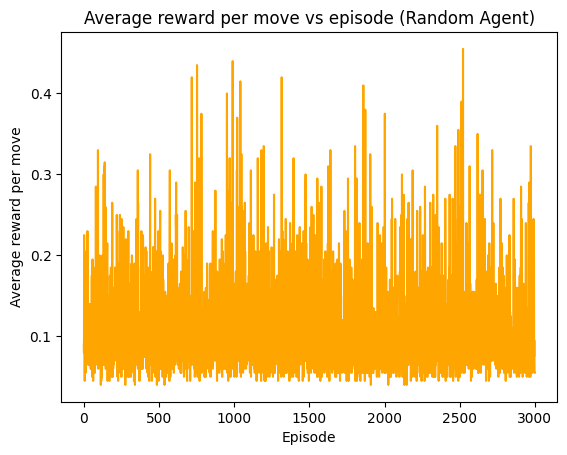

In [12]:
# Plot average reward per move for random agent
plt.plot(random_agent_average_rewards,color="orange")
plt.xlabel('Episode')
plt.ylabel('Average reward per move')
plt.title('Average reward per move vs episode (Random Agent)')
plt.show()

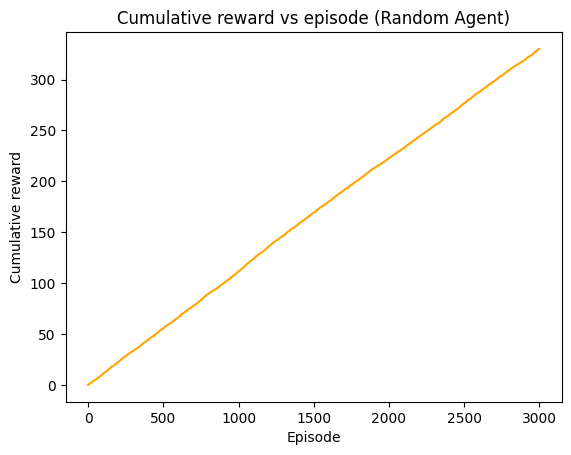

In [13]:
# Plot cumulative reward vs number of episodes for random agent
plt.plot(random_agent_cumulative_rewards,color="orange")
plt.xlabel('Episode')
plt.ylabel('Cumulative reward')
plt.title('Cumulative reward vs episode (Random Agent)')
plt.show()

### Observations from Q-learning algorithm on cartpole v1: 
After letting both the algorithm run for 3000 episodes we can see the following results. 

--> When we first implemented our Q learning algorithm on cartpole we can see that after all the episodes ends we get the average reward of 0.0492 per episode and cumulative reward of 73.95 for all the episodes. We can even observe from the graph that with the passing of each episodes our cumulative reward is increasing in linear manner. 

--> And when we let rendom agent run through our environment for 3000 episodes we experienced that our rendom agent is giving us more average reward compare to RL agent. for the random agent our average reward is 0.111 and cumulative reawrd is 166.45.

# Deep Q network on Cartpole V1 

In [14]:
# Installing appropriate tensorflow version for step function to work.
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow
    Foun

In [15]:
!pip install keras-rl2 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 4.1 MB/s eta 0:00:00


In [23]:
# Below we have implemented libraries which are necessary in the implementation of Deep Q-network on cartpole.

from tensorflow.keras.models import Sequential        # This will help us in creating linear neural network layers.
from tensorflow.keras.layers import Dense, Flatten    # Dense for the fully connected layer and flatten for the flattening the input
from tensorflow.keras.optimizers import Adam          # For the optimizer adam
from rl.agents.dqn import DQNAgent                    # With the help of this class we will import the deep Q network agent
from rl.memory import SequentialMemory                # this will help us in storing past experience 
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy  # for importing Epsilon greedy policy and boltzmann that will be used by our DQN agent
from gym import make                                  # This will help us in creating environment from gym
from gym.wrappers import TimeLimit                    # TimeLimit will help us in defining number of maximum steps that agent can tak in environment.

In [17]:
# Creating the CartPole environment for Deep Q network with the maximum steps of limit 500.
DQN_cartpole_env = TimeLimit(make('CartPole-v1'), max_episode_steps=500)

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [18]:
# Initiating the action space and observation space  for our environment.
DQN_action_space = DQN_cartpole_env.action_space.n
DQN_observations_space = DQN_cartpole_env.observation_space.shape[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Now we will define our Deep network model for cartpole v1 gym environment. 

DQN_cartpole_model = Sequential()   # define our instance for sequential model.
# Here we are adding the flatten layer to our model to ensure that all the inputs are in correct dimensions.
# Input_shape() here is a tuple which takes two arguments. in our case it's shape is (1,) + observation space of cartpole.
DQN_cartpole_model.add(Flatten(input_shape=(1,  DQN_observations_space)))
DQN_cartpole_model.add(Dense(64, activation='relu'))  # This will add dense layer with 64 units, and we are using ReLu as an activation function.
DQN_cartpole_model.add(Dense(32, activation='relu'))  # This is same hidden layer as above but 32 units. 
DQN_cartpole_model.add(Dense(32, activation='relu'))  # hidden layer with 32 units 
DQN_cartpole_model.add(Dense(16, activation='relu'))  # Another dense layer with 16 units and ReLU as an activation function 
DQN_cartpole_model.add(Dense(DQN_action_space, activation='linear'))   # This is our output layer Here this layer will output Q values for each episodes.

In [33]:
# Here sequentialmemory is class in Keras-rl library which will allows us to create a memory buffer.
# limit is the limit of the buffer we created. if the number of transactions stored in the buffer exceed beyond that number older 
# transactions will be removed for the newer transactions.
# window length 1 suggest that only current state is used.
DQN_memory_buffer = SequentialMemory(limit=10000, window_length=1)

In [34]:
# For choosing the policy we have initiated Boltzmannpolicy from the rl.policy.
DQN_boltzmann_policy = BoltzmannQPolicy()

In [35]:
# Create DQNAgent
DQN_cartpole_agent = DQNAgent(
               model=DQN_cartpole_model,            # This will use our earlier created DQN_cartpole_model for approximation of Q-function.
               nb_actions=DQN_action_space,         # Number of possible action that agent can take. 
               memory=DQN_memory_buffer,            # For storing agent's experience we will use memory buffer that we created earlier.
               nb_steps_warmup=10,                  # This function let's agent take the random steps before agent uses epsilon greedy policy. 
               target_model_update=1e-2,            # Here with the help of target_model_update we are updating our target network at every 100 steps. this will help us in stailiaing training process. 
               policy=DQN_boltzmann_policy)         # Here we are assigning boltzmann policy that we earlier created.

In [36]:
# Here we are compiling our DQN agent that we created using adam optimizer and accuracy as an evaluation metric.
DQN_cartpole_agent.compile(Adam(lr=1e-3), metrics=['mae'])

In [37]:
# Here we are fitting our DQN agent on cartpole environment.
# our maximum defined steps is 3000 as suggested in the instruction.
# here we have kept visualize as false because we don't want to see how model is being trained in rendered window.
history = DQN_cartpole_agent.fit(DQN_cartpole_env, nb_steps=3000, visualize=False, verbose=2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.9/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: Deprecation

Training for 3000 steps ...


/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) instead
  batch_idxs

   18/3000: episode: 1, duration: 1.102s, episode steps:  18, steps per second:  16, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.444 [0.000, 1.000],  loss: 0.502454, mae: 0.518101, mean_q: 0.056490
   32/3000: episode: 2, duration: 0.120s, episode steps:  14, steps per second: 117, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.786 [0.000, 1.000],  loss: 0.426350, mae: 0.508829, mean_q: 0.219825
   51/3000: episode: 3, duration: 0.168s, episode steps:  19, steps per second: 113, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.789 [0.000, 1.000],  loss: 0.287460, mae: 0.469394, mean_q: 0.602338
   66/3000: episode: 4, duration: 0.125s, episode steps:  15, steps per second: 120, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.533 [0.000, 1.000],  loss: 0.193004, mae: 0.526330, mean_q: 1.010463
   78/3000: episode: 5, duration: 0.105s, episode steps:  12, steps per seco

In [38]:
# Here we are testing our DQN agent for 1000 episodes. 
# Here we also used scores.history dictionary which contains cumalative reward per episodes.
DQN_agent_scores = DQN_cartpole_agent.test(DQN_cartpole_env, nb_episodes=1000, visualize=False)
# Getting the average and the cumulative reward for our DQN agent
DQN_average_reward_per_move = np.mean(DQN_agent_scores.history['episode_reward'])
DQn_cumulative_reward = np.cumsum(DQN_agent_scores.history['episode_reward']) 

Testing for 1000 episodes ...
Episode 1: reward: 165.000, steps: 165
Episode 2: reward: 157.000, steps: 157
Episode 3: reward: 190.000, steps: 190
Episode 4: reward: 183.000, steps: 183
Episode 5: reward: 173.000, steps: 173
Episode 6: reward: 172.000, steps: 172
Episode 7: reward: 163.000, steps: 163
Episode 8: reward: 141.000, steps: 141
Episode 9: reward: 143.000, steps: 143
Episode 10: reward: 394.000, steps: 394
Episode 11: reward: 169.000, steps: 169
Episode 12: reward: 158.000, steps: 158
Episode 13: reward: 173.000, steps: 173
Episode 14: reward: 141.000, steps: 141
Episode 15: reward: 148.000, steps: 148
Episode 16: reward: 161.000, steps: 161
Episode 17: reward: 206.000, steps: 206
Episode 18: reward: 189.000, steps: 189
Episode 19: reward: 188.000, steps: 188
Episode 20: reward: 148.000, steps: 148
Episode 21: reward: 164.000, steps: 164
Episode 22: reward: 163.000, steps: 163
Episode 23: reward: 174.000, steps: 174
Episode 24: reward: 207.000, steps: 207
Episode 25: reward:

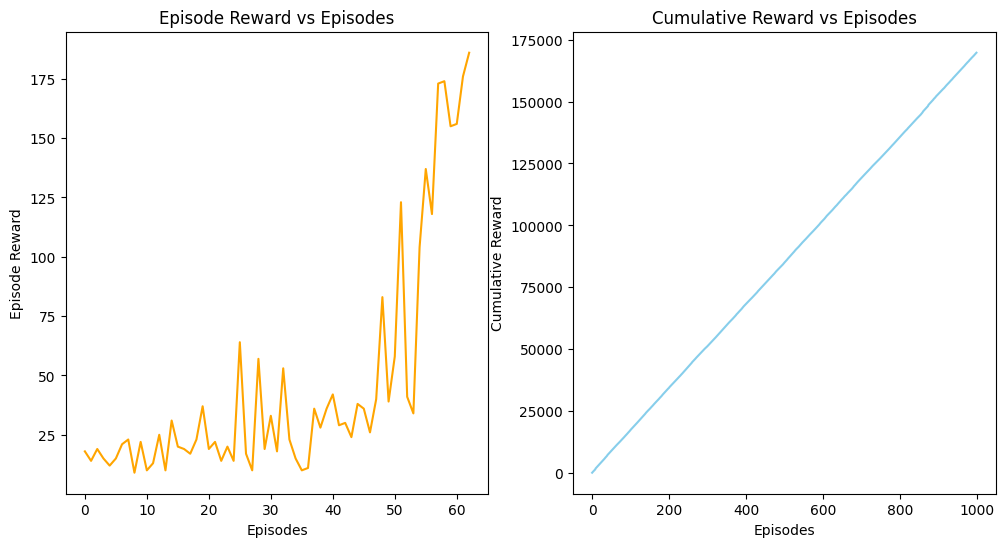

In [51]:
# Plot the metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['episode_reward'],color = 'orange')
plt.title('Episode Reward vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Episode Reward')

plt.subplot(1, 2, 2)
plt.plot(DQn_cumulative_reward, color='skyblue')
plt.title('Cumulative Reward vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.show()

In [41]:
print(f'Average Reward per Move: {DQN_average_reward_per_move}')

Average Reward per Move: 169.704


In [47]:
# Now that we ahve defined our DQN agent we will now create the random agent and will see the results of that.
def random_agent(env):
    total_rewards_random = 0
    DQN_reset_state = env.reset()    # restting the environment.
    done = False    # done flag 
    while not done: 
        # here our random agent won't follow any policy it will take random action.
        DQN_random_action = np.random.randint(DQN_action_space)
        # then here we are passing our action taken by random agent to step function to obtain state, reward  for the next state. 
        next_state, reward, done, info = env.step(DQN_random_action)
        # Adding the total reward.
        total_reward_random = total_reward_random + reward
        if done:
            break
    return total_reward    # returning the total reward.

In [ ]:
# Evaluate the random agent
random_rewards = []
for _ in range(1000):
    # appending the rewards to the list. 
    random_rewards.append(random_agent(DQN_cartpole_env))
random_average_reward_per_move = np.mean(random_rewards)
random_cumulative_reward = np.cumsum(random_rewards)

In [ ]:
print(f'Average Reward per Move (RL Agent): {DQN_average_reward_per_move}')
print(f'Average Reward per Move (Random Agent): {random_average_reward_per_move}')

Average Reward per Move (RL Agent): 292.404
Average Reward per Move (Random Agent): 22.044


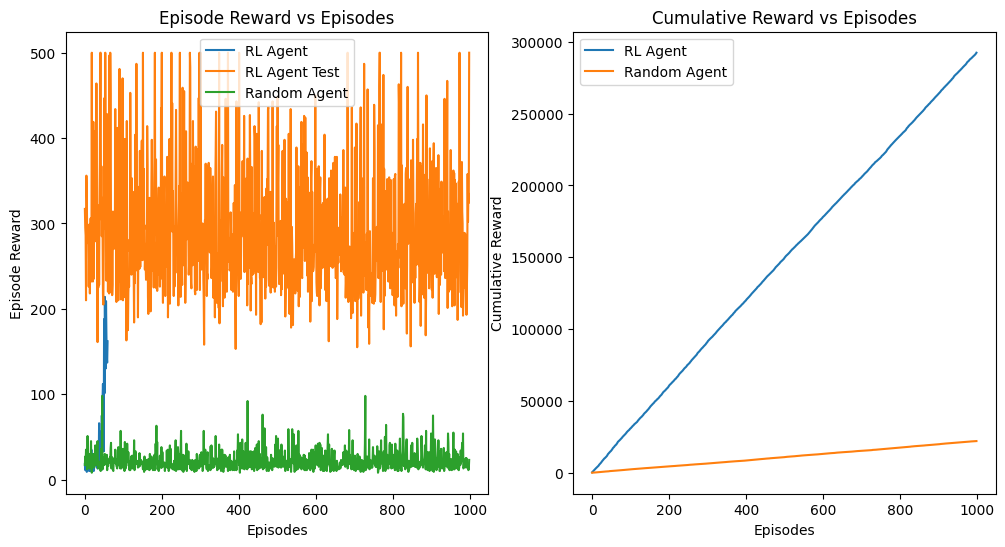

In [ ]:
# Plot the metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['episode_reward'], label='RL Agent')
plt.plot(DQN_agent_scores.history['episode_reward'], label='RL Agent Test')
plt.plot(random_rewards, label='Random Agent')
plt.title('Episode Reward vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Episode Reward')
plt.legend()
plt.subplot(1, 2, 2)


plt.plot(DQN_cumulative_reward, label='RL Agent')
plt.plot(random_cumulative_reward, label='Random Agent')
plt.title('Cumulative Reward vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

## Comaparison 

After successfully running the cartpole environment on deep q network we discovered that Rl agent performs much better with Deep q network than taking random agent.

As we can se that average reward for the RL agent is 292.04 while random agent just gives us 22.044 average reward.